In [1]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkarmanohardalvi/lungs-disease-dataset-4-types

Dataset URL: https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types
License(s): unknown
 99% 2.00G/2.02G [00:19<00:00, 105MB/s] 
100% 2.02G/2.02G [00:19<00:00, 111MB/s]


In [4]:
!unzip lungs-disease-dataset-4-types.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0675-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0678-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0680-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0682-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0683-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0684-0001-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0686-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0690-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0692-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0693-0001.jpeg  
  inflating: dataset/Lung Disease Dataset/train/Normal/NORMAL2-IM-0695-0001.jpeg  
  inflating: dataset/Lung Disea

In [5]:
import os
base_path = "dataset/Lung Disease Dataset"
print(os.listdir(base_path))


['val', 'test', 'train']


In [6]:
train_dir = "dataset/Lung Disease Dataset/train"
test_dir = "dataset/Lung Disease Dataset/test"
val_dir = "dataset/Lung Disease Dataset/val"


In [7]:
import  tensorflow as tf

import numpy as np
import matplotlib .pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential  , Model
import cv2 as cv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")


In [8]:
def count_image(directory) :
    categories = os.listdir(directory)
    category_count = {
        category : len(os.listdir(os.path.join(directory,category))) for category in categories
    }
    return category_count

In [9]:
train_count = count_image(train_dir)
test_count = count_image(test_dir)
validation_count = count_image(val_dir)
print(f"the train count{train_count}")
print("----------------")
print(f"the test count{test_count}")
print("---------------------------------")
print(f" tne validation{validation_count}")

the train count{'Tuberculosis': 1220, 'Bacterial Pneumonia': 1205, 'Corona Virus Disease': 1218, 'Viral Pneumonia': 1204, 'Normal': 1207}
----------------
the test count{'Tuberculosis': 408, 'Bacterial Pneumonia': 403, 'Corona Virus Disease': 407, 'Viral Pneumonia': 403, 'Normal': 404}
---------------------------------
 tne validation{'Tuberculosis': 406, 'Bacterial Pneumonia': 401, 'Corona Virus Disease': 406, 'Viral Pneumonia': 401, 'Normal': 402}


In [16]:
img_height, img_width = 299 , 299
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    zoom_range = 0.2 ,
    shear_range = 0.2 ,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 10 ,
    brightness_range = [0.8, 1.2],
    horizontal_flip=True ,
    validation_split = 0.2
)


val_datagen = ImageDataGenerator(
    rescale = 1./255 ,
    validation_split = 0.2

)


train_data = train_datagen.flow_from_directory(
    "dataset/Lung Disease Dataset/train" ,
    batch_size = batch_size ,
    target_size=(img_height, img_width) ,
    class_mode="categorical" ,
    seed = 42 ,
    subset = "training" ,
    shuffle = True ,

 )



val_data = val_datagen.flow_from_directory(
   "dataset/Lung Disease Dataset/train" ,
    batch_size =batch_size ,
    seed = 42 ,
    target_size=(img_height, img_width)  ,
    class_mode = "categorical" ,
    subset = "validation" ,

)

Found 4845 images belonging to 5 classes.
Found 1209 images belonging to 5 classes.


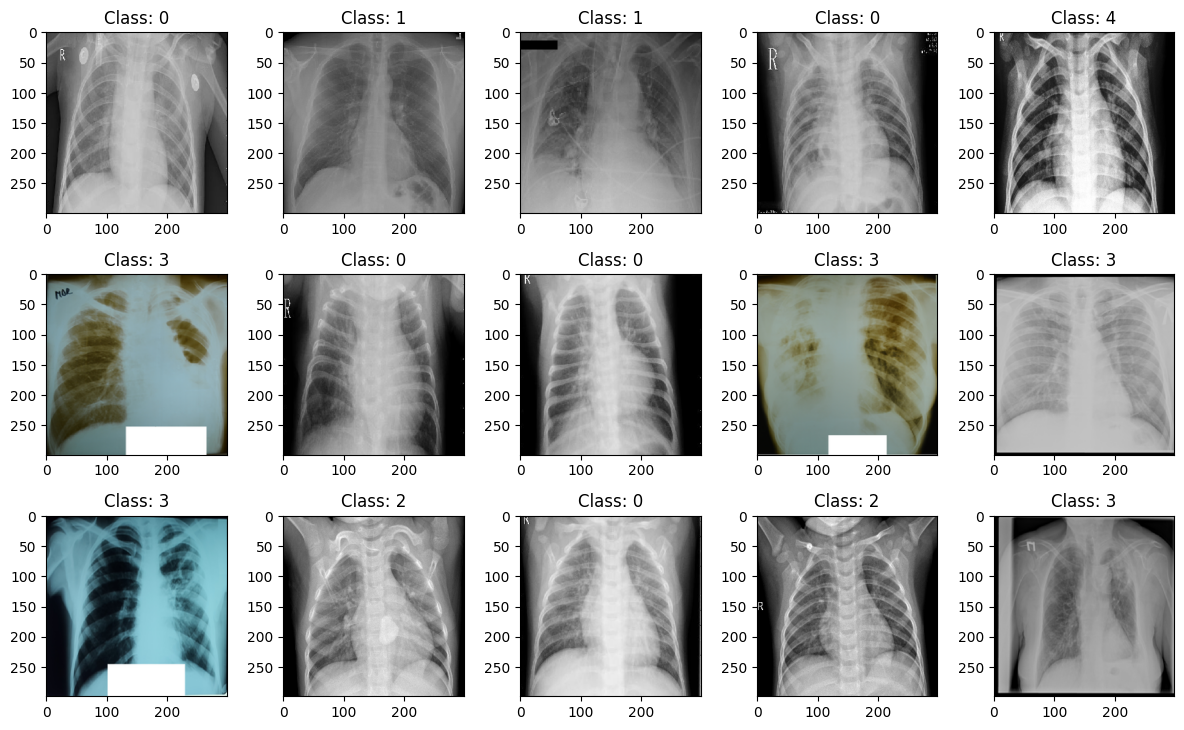

In [17]:
import matplotlib.pyplot as plt

images, labels = next(iter(val_data))

num_images = 15

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    #plt.axis('off')
plt.tight_layout()
plt.show()



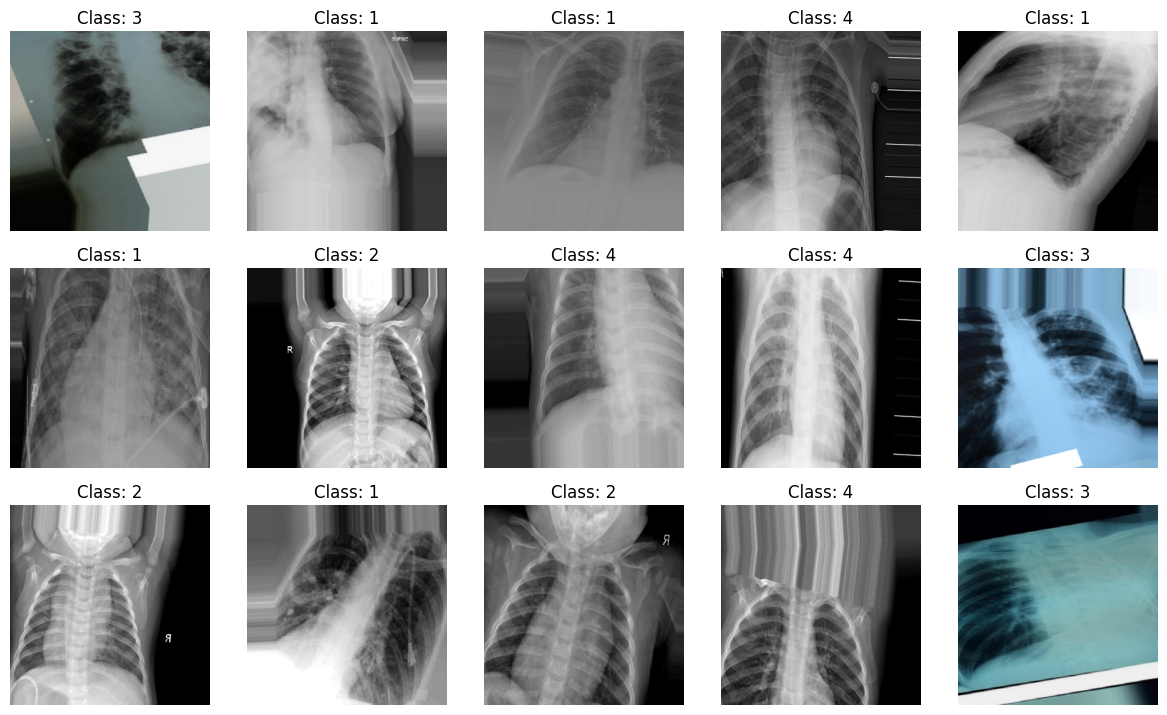

In [18]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_data))

num_images = 15

plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = DenseNet121(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(5, activation='softmax')(x)

model_DenseNet121 = Model(inputs=base_model.input, outputs=predictions)


In [20]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model_DenseNet121.compile(optimizer = optimizer
                          , loss = 'categorical_crossentropy'
                          , metrics = ['accuracy'])
model_DenseNet121.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 305, 305,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 150, 150,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 150, 150,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 150, 150,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 152, 152,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 75, 75,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 75, 75,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 75, 75,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 75, 75,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 75, 75,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 75, 75,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 75, 75,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 75, 75,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 75, 75,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 75, 75,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 75, 75,    │     12,288 │ conv2_block2_0_r

 Total params: 7,564,869 (28.86 MB)

 Trainable params: 527,365 (2.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=10, restore_best_weights=True , monitor='val_loss')

epochs = 50

history = model_DenseNet121.fit(train_data,
                        epochs = epochs,
                        batch_size = batch_size,
                        validation_data = val_data,
                        callbacks = [earlystop])

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.4334 - loss: 1.3566 - val_accuracy: 0.7031 - val_loss: 0.7504
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7150 - loss: 0.7516 - val_accuracy: 0.7146 - val_loss: 0.6587
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7430 - loss: 0.6466 - val_accuracy: 0.7229 - val_loss: 0.6383
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7655 - loss: 0.6048 - val_accuracy: 0.7204 - val_loss: 0.6142
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7732 - loss: 0.5670 - val_accuracy: 0.7552 - val_loss: 0.5558
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7868 - loss: 0.5461 - val_accuracy: 0.7262 - val_loss: 0.5971
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.7929 - loss: 0.5326 - val_accuracy: 0.7304 - val_loss: 0.6124
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7965 - loss: 0.5131 - val_accu

In [22]:
train_acc , train_loss = model_DenseNet121.evaluate(train_data)
print(f"the train accuracy{train_acc*100:.2f}%")
val_acc , val_loss = model_DenseNet121.evaluate(val_data)
print(f"the validation accuracy{val_acc*100:.2f}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 150s 984ms/step - accuracy: 0.8676 - loss: 0.3405
the train accuracy33.74%
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.8072 - loss: 0.4123
the validation accuracy42.16%


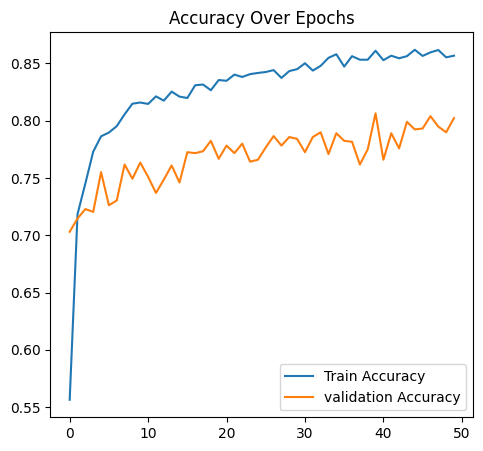

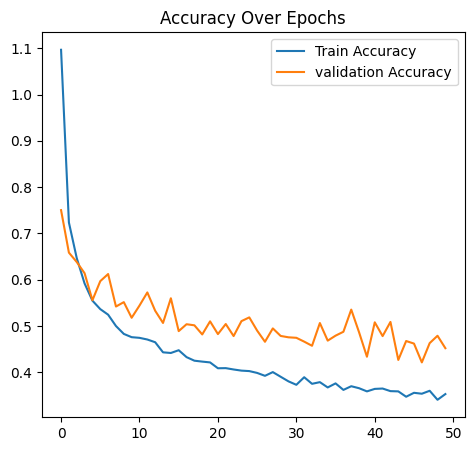

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range =range(len(acc))
plt.figure(figsize=(12,5))
plt.subplot(1,2 , 1)
plt.plot(epochs_range , acc ,  label="Train Accuracy")
plt.plot(epochs_range ,val_acc ,  label="validation Accuracy")
plt.title ("Accuracy Over Epochs")
plt.legend()


plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(epochs_range , loss ,  label="Train Accuracy")
plt.plot(epochs_range ,val_loss ,  label="validation Accuracy")
plt.title ("Accuracy Over Epochs")
plt.legend()

plt.show()

In [24]:
model_DenseNet121.save("Lungs Disease.h5")